In [1]:
import numpy as np
import pandas as pd

import sklearn
from sklearn import preprocessing, decomposition

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read the data - directly from the web!
#                 column names are separate, so we add them manually
data = pd.read_csv(
    filepath_or_buffer='tata.tsv', 
    header=None,
    names = None,
    sep='\t')

# Output the data (notice Pandas will split long files)
data

0         1         2         3         4         5         6   \
0    0.013158  0.013158  0.013158  0.013158  0.013158  0.381579  0.013158   
1    0.020833  0.020833  0.020833  0.104167  0.354167  0.020833  0.020833   
2    0.008621  0.008621  0.008621  0.215517  0.008621  0.043103  0.008621   
3    0.582031  0.066406  0.003906  0.003906  0.003906  0.019531  0.050781   
4    0.005319  0.005319  0.005319  0.005319  0.005319  0.069149  0.005319   
5    0.004167  0.004167  0.004167  0.004167  0.004167  0.004167  0.004167   
6    0.016667  0.016667  0.016667  0.016667  0.016667  0.083333  0.150000   
7    0.065789  0.118421  0.013158  0.013158  0.013158  0.118421  0.013158   
8    0.035714  0.035714  0.035714  0.035714  0.035714  0.178571  0.035714   
9    0.003846  0.096154  0.019231  0.003846  0.173077  0.019231  0.003846   
10   0.050000  0.010000  0.010000  0.010000  0.010000  0.250000  0.010000   
11   0.022727  0.022727  0.386364  0.022727  0.022727  0.113636  0.022727   
12   0.019231  0.019231  0.634615  0.019231  0.019231  0.019231  0.019231   
13   0.345238  0.011905  0.011905  0.059524  0.011905  0.011905  0.059524   
14   0.016667  0.016667  0.016667  0.016667  0.016667  0.016667  0.016667   
15   0.016667  0.216667  0.016667  0.083333  0.016667  0.016667  0.016667   
16   0.119318  0.005682  0.119318  0.073864  0.005682  0.392045  0.005682   
17   0.056250  0.106250  0.006250  0.006250  0.006250  0.006250  0.006250   
18   0.191176  0.014706  0.014706  0.132353  0.014706  0.014706  0.014706   
19   0.004808  0.254808  0.062500  0.004808  0.004808  0.004808  0.004808   
20   0.031250  0.031250  0.031250  0.031250  0.156250  0.031250  0.156250   
21   0.012500  0.012500  0.012500  0.162500  0.012500  0.012500  0.012500   
22   0.019231  0.019231  0.019231  0.326923  0.019231  0.096154  0.019231   
23   0.020833  0.187500  0.020833  0.020833  0.020833  0.020833  0.020833   
24   0.009615  0.086538  0.009615  0.048077  0.009615  0.009615  0.009615   
25   0.009259  0.009259  0.120370  0.083333  0.305556  0.046296  0.009259   
26   0.025000  0.025000  0.025000  0.025000  0.325000  0.025000  0.025000   
27   0.008065  0.072581  0.008065  0.072581  0.008065  0.008065  0.008065   
28   0.437500  0.004167  0.004167  0.037500  0.237500  0.004167  0.054167   
29   0.009259  0.009259  0.046296  0.009259  0.046296  0.009259  0.009259   
..        ...       ...       ...       ...       ...       ...       ...   
970  0.028409  0.005682  0.005682  0.005682  0.005682  0.005682  0.028409   
971  0.023936  0.013298  0.002660  0.002660  0.066489  0.598404  0.077128   
972  0.162500  0.262500  0.012500  0.012500  0.012500  0.012500  0.062500   
973  0.019231  0.096154  0.019231  0.019231  0.173077  0.019231  0.019231   
974  0.050000  0.005556  0.005556  0.005556  0.361111  0.027778  0.050000   
975  0.208333  0.008333  0.075000  0.008333  0.008333  0.041667  0.008333   
976  0.078125  0.140625  0.015625  0.015625  0.015625  0.015625  0.015625   
977  0.001923  0.001923  0.086538  0.001923  0.240385  0.025000  0.009615   
978  0.025000  0.025000  0.025000  0.125000  0.025000  0.025000  0.025000   
979  0.062500  0.012500  0.012500  0.012500  0.112500  0.012500  0.012500   
980  0.025000  0.025000  0.025000  0.025000  0.025000  0.025000  0.025000   
981  0.031250  0.156250  0.031250  0.031250  0.281250  0.031250  0.031250   
982  0.029762  0.101190  0.220238  0.077381  0.053571  0.053571  0.005952   
983  0.013889  0.013889  0.013889  0.013889  0.236111  0.013889  0.125000   
984  0.015625  0.015625  0.015625  0.015625  0.015625  0.140625  0.078125   
985  0.017857  0.017857  0.017857  0.017857  0.017857  0.017857  0.017857   
986  0.008621  0.008621  0.008621  0.008621  0.008621  0.008621  0.077586   
987  0.006410  0.006410  0.006410  0.032051  0.006410  0.006410  0.006410   
988  0.096154  0.019231  0.019231  0.096154  0.250000  0.019231  0.019231   
989  0.010417  0.177083  0.052083  0.010417  0.010417  0.052083  0.052083   
990  0.

In [3]:
data.describe()

0            1            2            3            4   \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      0.051494     0.050209     0.054694     0.053933     0.048582   
std       0.079396     0.074768     0.093874     0.101168     0.070008   
min       0.001603     0.001838     0.000791     0.000791     0.000791   
25%       0.012500     0.011905     0.011364     0.010417     0.012500   
50%       0.020833     0.020833     0.020833     0.019231     0.020833   
75%       0.043265     0.043357     0.042026     0.035714     0.041667   
max       0.683333     0.672222     0.711207     0.712500     0.522727   

                5            6            7            8            9   \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      0.048726     0.049728     0.049239     0.055095     0.027389   
std       0.086231     0.072400     0.075306     0.110490     0.075827   
min       0.001838     0.000791     0.002016     0.000791     0.001603   
25%       0.011364     0.012500     0.012351     0.010417     0.009259   
50%       0.020182     0.020833     0.020833     0.019231     0.015625   
75%       0.035714     0.052083     0.046296     0.032943     0.025000   
max       0.826923     0.625000     0.592105     0.732955     0.962816   

                10           11           12           13           14  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      0.049178     0.045149     0.053816     0.046725     0.066142   
std       0.066975     0.080696     0.097069     0.071668     0.115685   
min       0.000791     0.000791     0.000791     0.000791     0.000791   
25%       0.013158     0.011364     0.010870     0.012500     0.010417   
50%       0.022727     0.019231     0.019231     0.020833     0.019231   
75%       0.057495     0.031250     0.035714     0.035714     0.035714   
max       0.539474     0.682500     0.701923     0.642045     0.690000   

                15           16           17           18           19  
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000  
mean      0.056441     0.047503     0.047860     0.048687     0.049408  
std       0.079919     0.081847     0.099329     0.077597     0.068467  
min       0.000791     0.000791     0.000791     0.000791     0.000791  
25%       0.012993     0.011364     0.010000     0.012500     0.013158  
50%       0.022727     0.020833     0.017857     0.020833     0.022727  
75%       0.065789     0.035714     0.031250     0.035714     0.054348  
max       0.539474     0.635417     0.726562     0.661765     0.822917

In [7]:
data_std = preprocessing.StandardScaler().fit_transform(data)
data_std = pd.DataFrame(data_std, columns=list(data))
data_std.describe()

0             1             2             3             4   \
count  1.000000e+03  1.000000e+03  1.000000e+03  1.000000e+03  1.000000e+03   
mean  -4.901635e-17  2.116640e-16 -1.216249e-16  5.329071e-18  7.926992e-17   
std    1.000500e+00  1.000500e+00  1.000500e+00  1.000500e+00  1.000500e+00   
min   -6.287070e-01 -6.472757e-01 -5.744978e-01 -5.255499e-01 -6.829813e-01   
25%   -4.913840e-01 -5.125710e-01 -4.618166e-01 -4.303583e-01 -5.156480e-01   
50%   -3.863722e-01 -3.930938e-01 -3.608890e-01 -3.431913e-01 -3.965549e-01   
75%   -1.037006e-01 -9.169464e-02 -1.350201e-01 -1.801778e-01 -9.882232e-02   
max    7.962061e+00  8.323432e+00  6.997080e+00  6.512888e+00  6.776095e+00   

                 5             6             7             8             9   \
count  1.000000e+03  1.000000e+03  1.000000e+03  1.000000e+03  1.000000e+03   
mean  -1.711964e-16  1.053047e-16  3.358425e-17  3.996803e-17  5.476175e-17   
std    1.000500e+00  1.000500e+00  1.000500e+00  1.000500e+00  1.000500e+00   
min   -5.440119e-01 -6.762587e-01 -6.274009e-01 -4.917238e-01 -3.402440e-01   
25%   -4.334935e-01 -5.144531e-01 -4.900911e-01 -4.045639e-01 -2.392175e-01   
50%   -3.311751e-01 -3.992941e-01 -3.773988e-01 -3.247515e-01 -1.552245e-01   
75%   -1.509652e-01  3.255199e-02 -3.910221e-02 -2.005851e-01 -3.152578e-02   
max    9.029030e+00  7.949730e+00  7.212422e+00  6.138076e+00  1.234252e+01   

                 10            11            12            13            14  \
count  1.000000e+03  1.000000e+03  1.000000e+03  1.000000e+03  1.000000e+03   
mean  -1.743050e-17 -3.141931e-17  1.049716e-16  6.611378e-17  2.386980e-17   
std    1.000500e+00  1.000500e+00  1.000500e+00  1.000500e+00  1.000500e+00   
min   -7.228181e-01 -5.499706e-01 -5.465297e-01 -6.412445e-01 -5.651912e-01   
25%   -5.380779e-01 -4.188884e-01 -4.426508e-01 -4.777858e-01 -4.819447e-01   
50%   -3.951263e-01 -3.213484e-01 -3.564714e-01 -3.614504e-01 -4.057159e-01   
75%    1.242434e-01 -1.723290e-01 -1.865748e-01 -1.537085e-01 -2.631580e-01   
max    7.324263e+00  7.902137e+00  6.680077e+00  8.310828e+00  5.395440e+00   

                 15            16            17            18            19  
count  1.000000e+03  1.000000e+03  1.000000e+03  1.000000e+03  1.000000e+03  
mean  -3.375078e-17  3.724798e-17 -3.835821e-17  4.507505e-17 -4.862777e-17  
std    1.000500e+00  1.000500e+00  1.000500e+00  1.000500e+00  1.000500e+00  
min   -6.966768e-01 -5.710079e-01 -4.741085e-01 -6.175472e-01 -7.104362e-01  
25%   -5.439180e-01 -4.417693e-01 -3.813515e-01 -4.665793e-01 -5.297217e-01  
50%   -4.220613e-01 -3.260114e-01 -3.022098e-01 -3.591336e-01 -3.898850e-01  
75%    1.170287e-01 -1.441060e-01 -1.673091e-01 -1.672664e-01  7.218392e-02  
max    6.047018e+00  7.186680e+00  6.836282e+00  7.904702e+00  1.130323e+01

In [9]:
svd_u,svd_s,svd_v = np.linalg.svd(data_std.transpose())

print("U:", svd_u)
print()
print("S:", svd_s)
print()
print("V:", svd_v)

U: [[ -4.12365839e-02   1.38075661e-01  -3.59124086e-01   1.68599630e-01
    1.67979651e-01  -3.32765781e-01   1.44837108e-01   4.14003982e-01
   -2.31209940e-01  -2.18536672e-01  -1.42663999e-01   1.54533974e-01
   -3.83423462e-02  -5.57272262e-02  -1.23620971e-01   8.75825906e-02
   -5.21604680e-01  -4.32845363e-02   6.21597279e-03   2.08684389e-01]
 [  2.08197569e-01   3.62516920e-01  -1.88394713e-01  -2.54304268e-01
   -3.66239018e-01  -2.13459846e-02  -1.06886863e-01  -1.51512238e-01
    1.71519753e-03   8.49448851e-02  -1.16295032e-01  -2.35606236e-01
   -2.18824826e-01  -1.82467064e-01   1.94191900e-02   1.28667868e-01
   -1.01580938e-01   4.30960940e-01   3.83502462e-01   1.96519653e-01]
 [ -1.36802207e-01   1.54677627e-01   1.69605638e-01  -3.18834524e-01
    1.52408402e-01  -1.88041324e-01   1.89119060e-01  -5.10696980e-01
    2.28659069e-01  -3.82469719e-01  -3.14792326e-01  -5.90562265e-02
    3.01547368e-02   9.25783579e-02   4.77455931e-02  -1.39153106e-01
   -1.54994469e

In [10]:
prop_svd = [s**2/sum([s**2 for s in svd_s]) for s in svd_s]

print(sum(prop_svd))
print(prop_svd)

1.0
[0.07109637945106953, 0.062298174380985345, 0.06012448449928396, 0.0575610917274159, 0.057263521017105835, 0.056380036461634864, 0.054313120442147547, 0.053336029555738441, 0.052859391706964687, 0.051321729910622574, 0.051067000144639357, 0.05029273388938086, 0.04969537520218089, 0.048395718081620596, 0.047606117776806289, 0.046028909056504974, 0.045048079044042046, 0.043654216008929533, 0.041657891642926749, 9.5588782924376787e-32]


array([ 0.07109638,  0.13339455,  0.19351904,  0.25108013,  0.30834365,
        0.36472369,  0.41903681,  0.47237284,  0.52523223,  0.57655396,
        0.62762096,  0.67791369,  0.72760907,  0.77600479,  0.8236109 ,
        0.86963981,  0.91468789,  0.95834211,  1.        ,  1.        ])

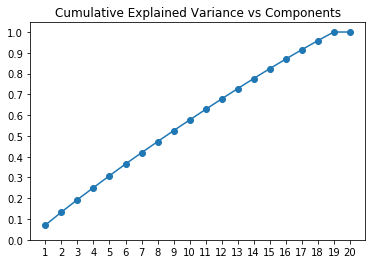

In [11]:
plt.plot([x+1 for x in range(len(prop_svd))], np.cumsum(prop_svd), '-o')

plt.yticks(np.linspace(0, 1, 11, endpoint=True))
plt.xticks(np.linspace(1, len(prop_svd), len(prop_svd), endpoint=True))
plt.title('Cumulative Explained Variance vs Components')

np.cumsum(prop_svd)

In [12]:
numpcs = 2

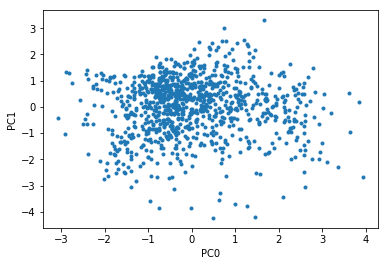

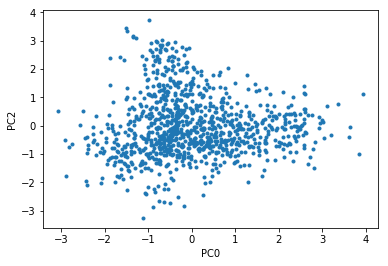

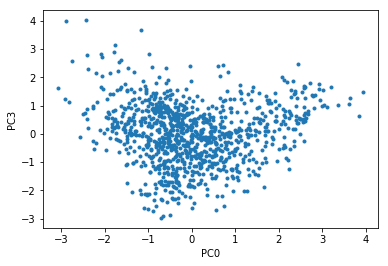

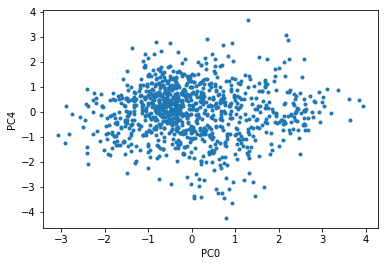

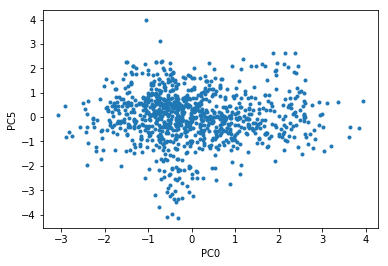

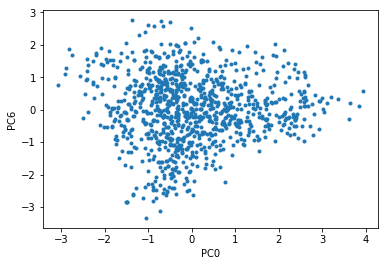

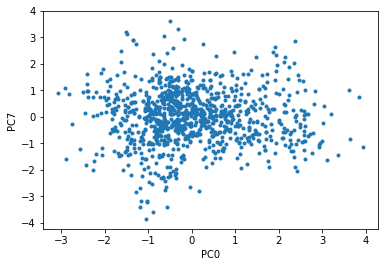

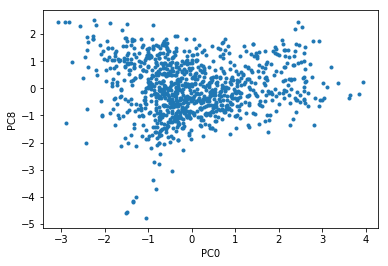

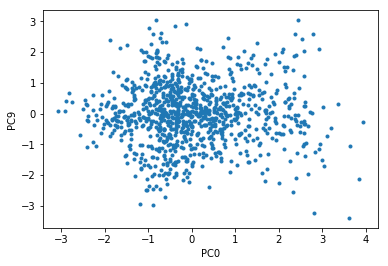

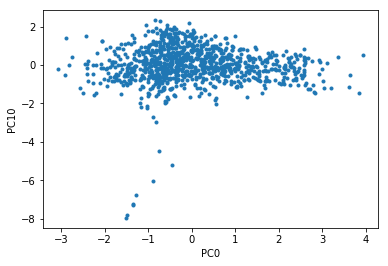

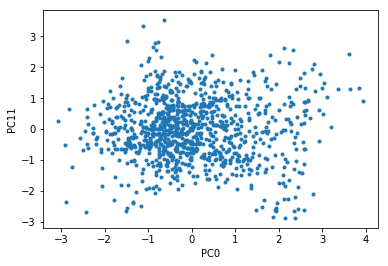

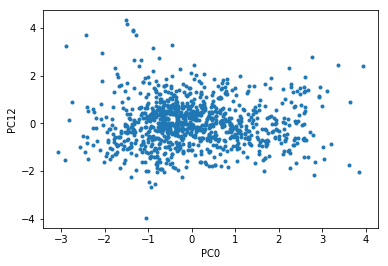

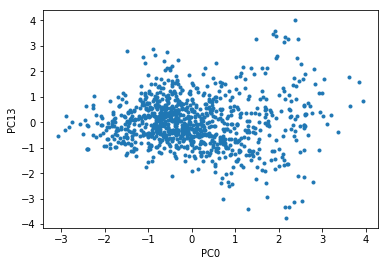

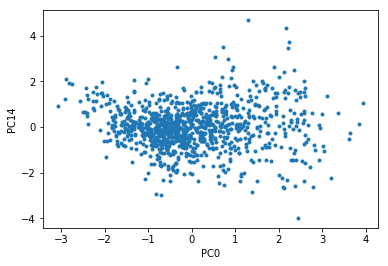

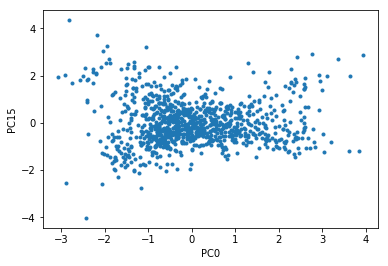

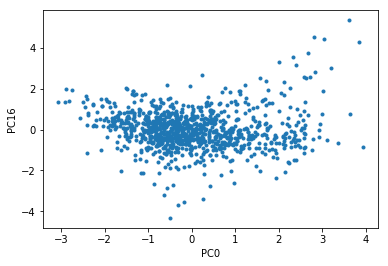

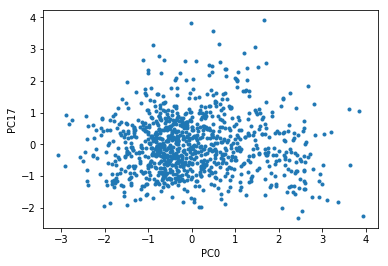

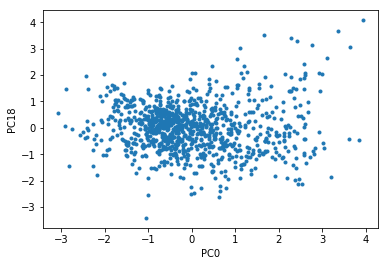

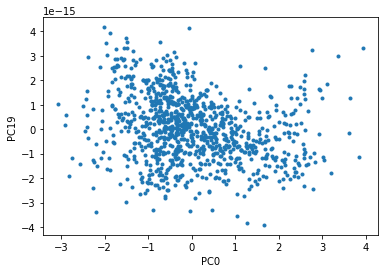

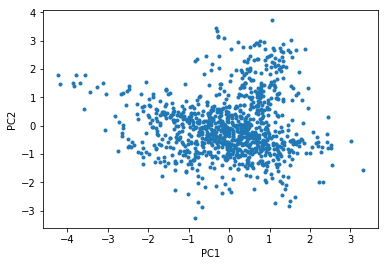

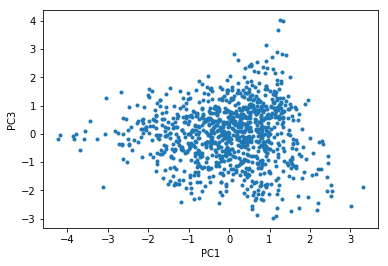

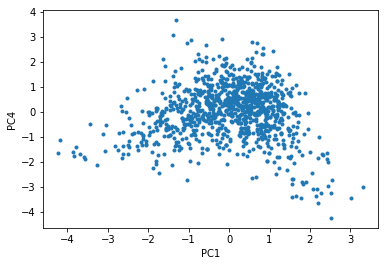

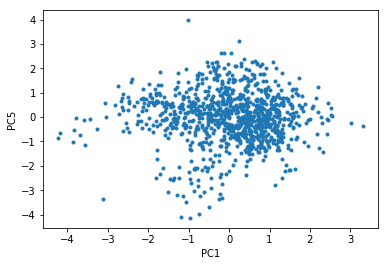

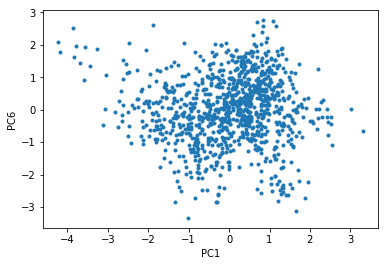

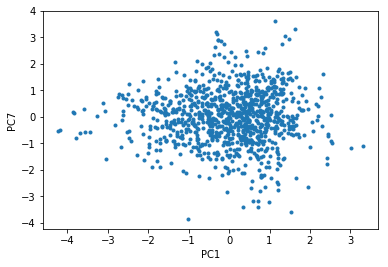

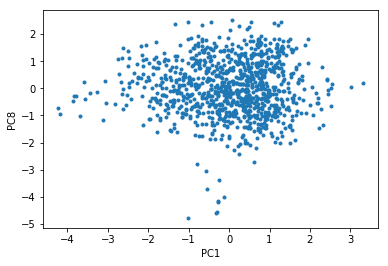

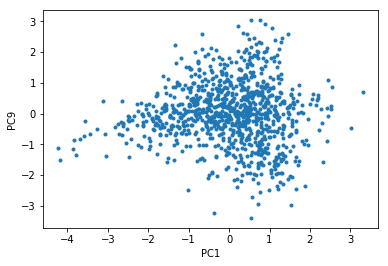

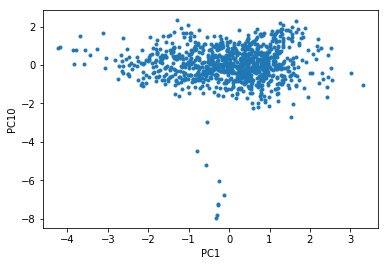

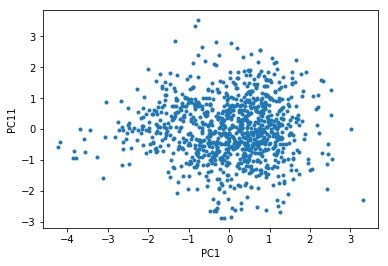

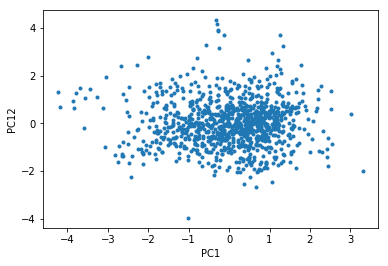

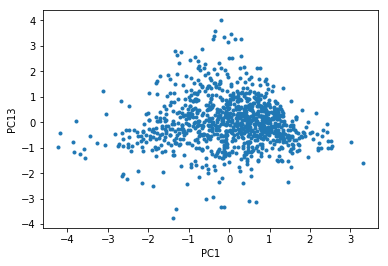

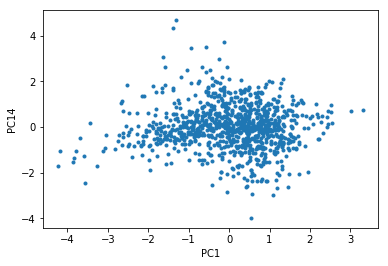

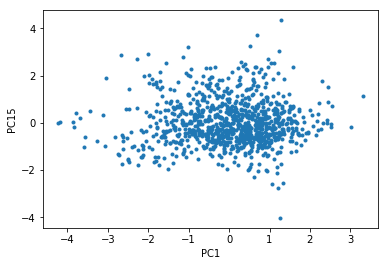

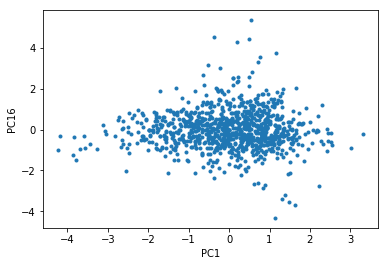

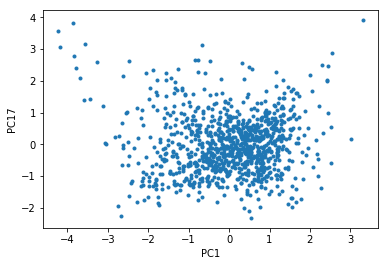

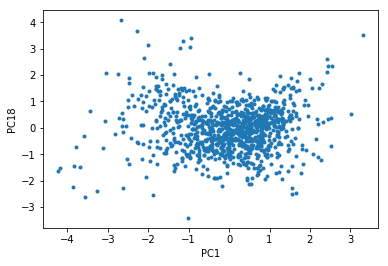

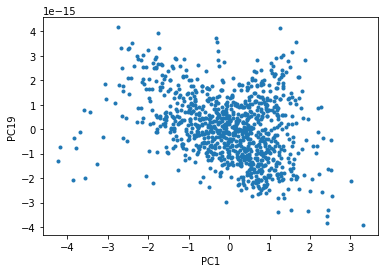

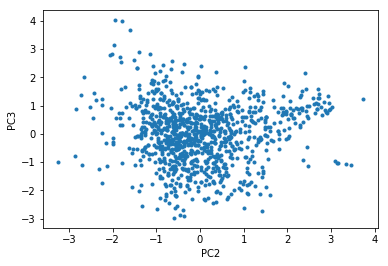

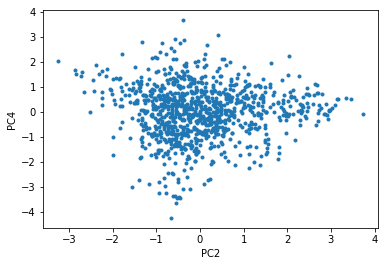

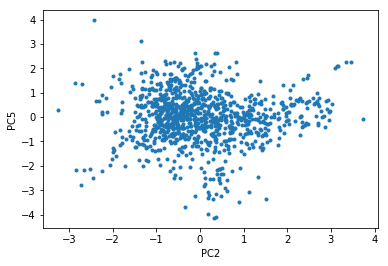

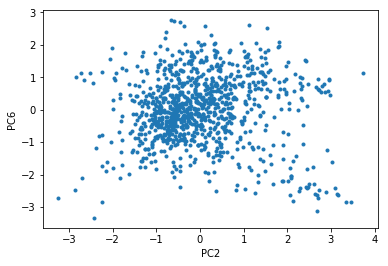

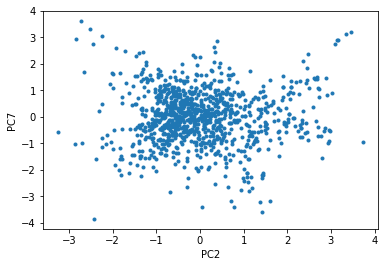

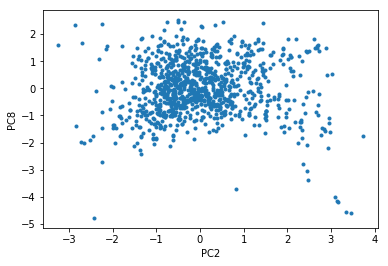

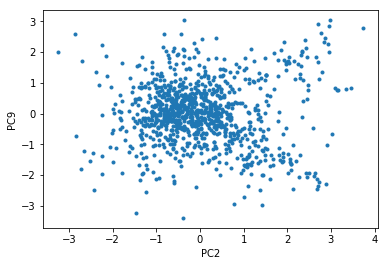

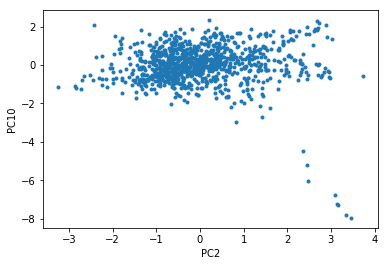

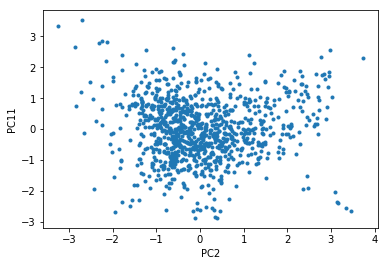

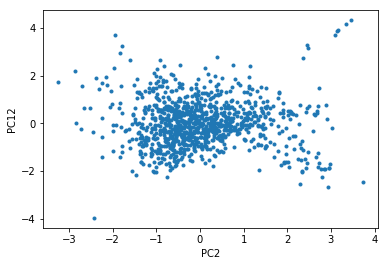

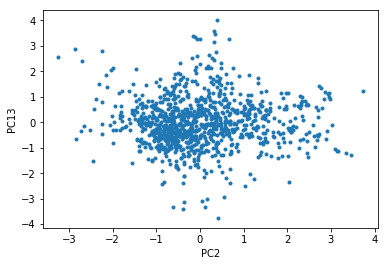

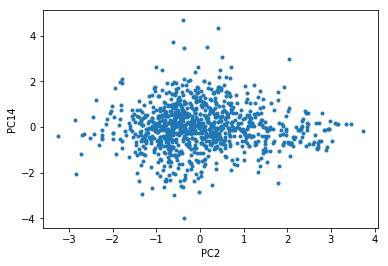

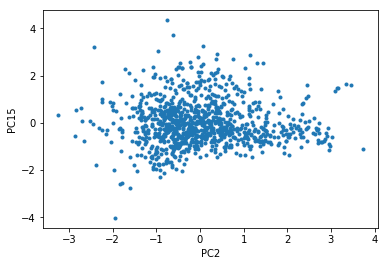

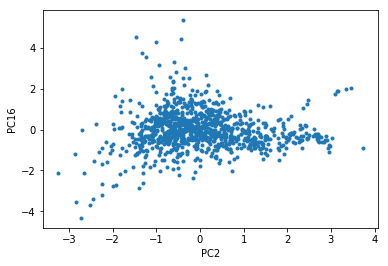

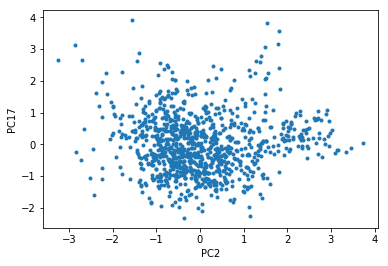

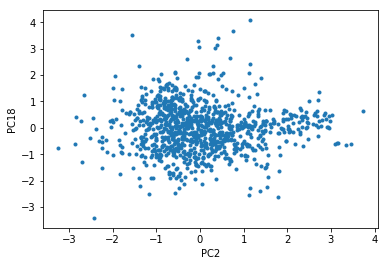

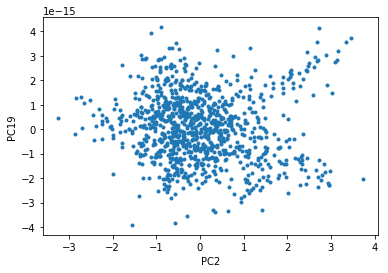

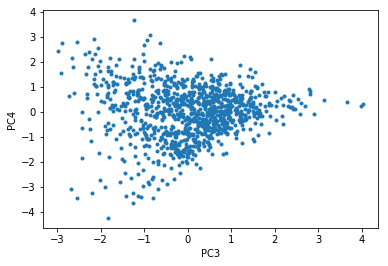

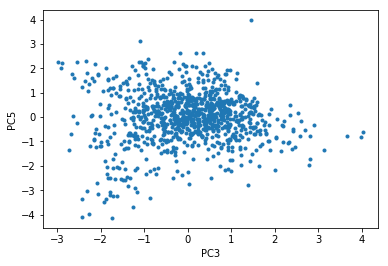

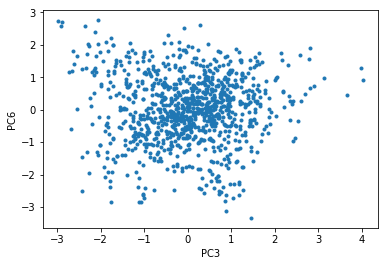

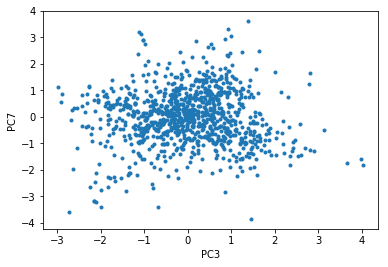

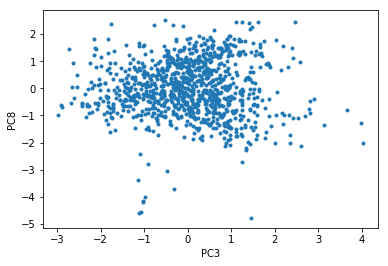

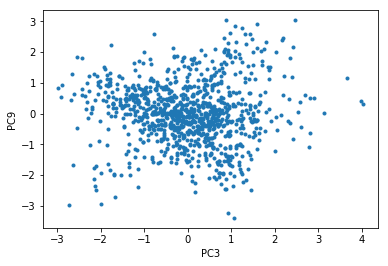

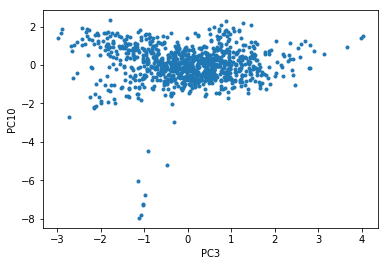

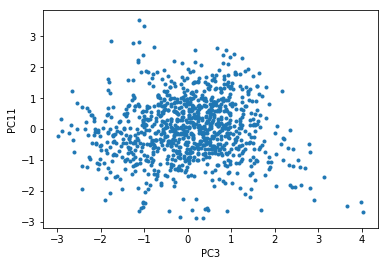

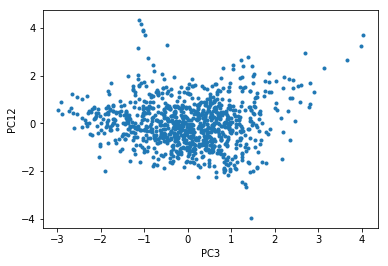

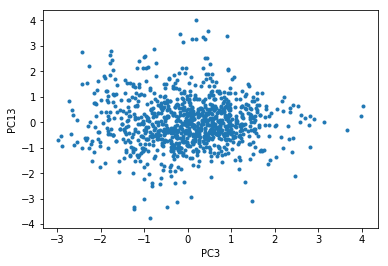

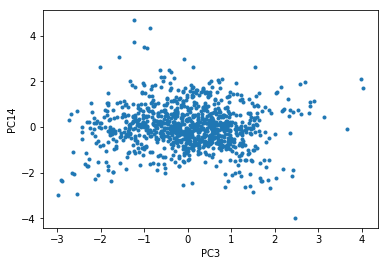

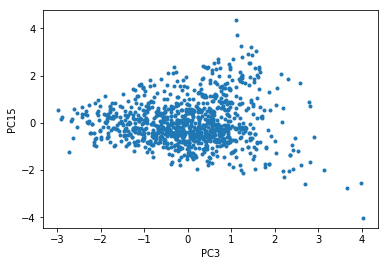

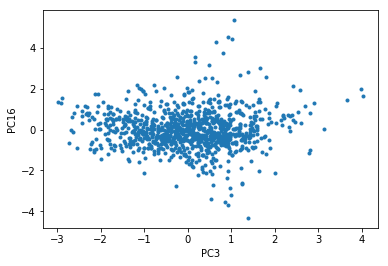

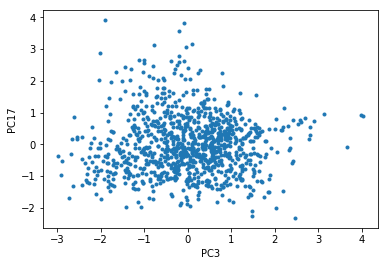

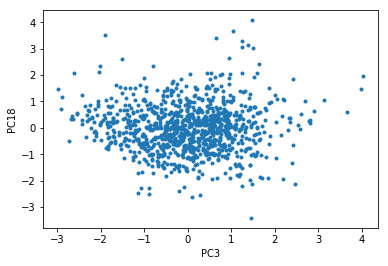

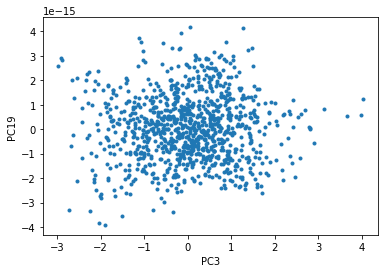

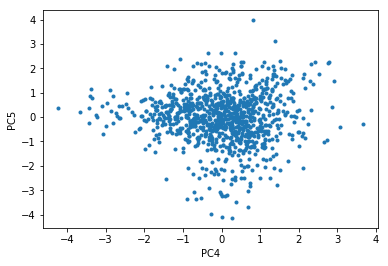

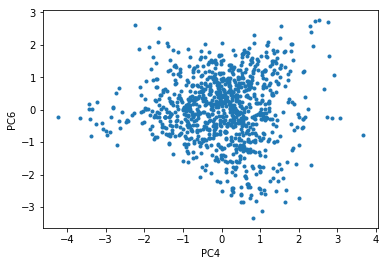

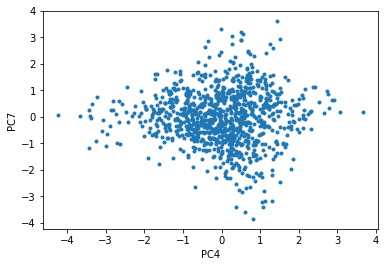

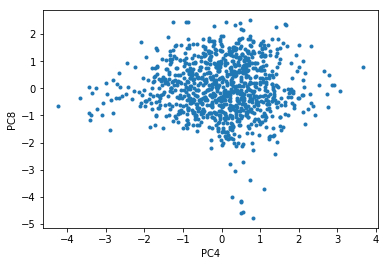

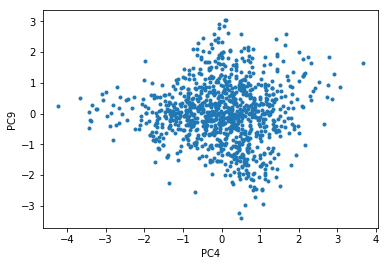

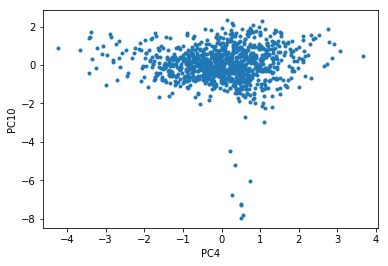

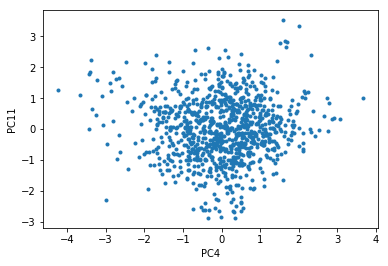

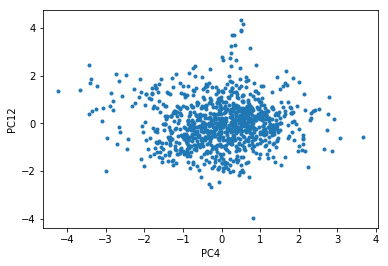

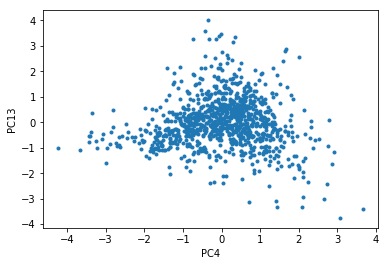

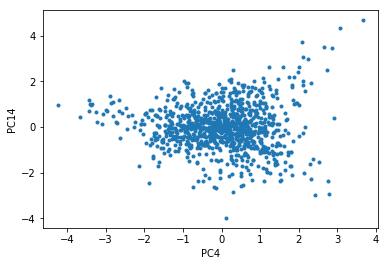

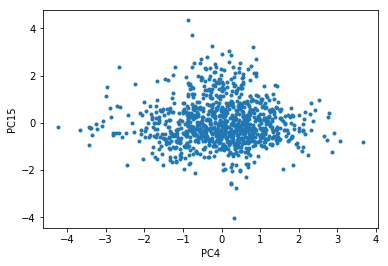

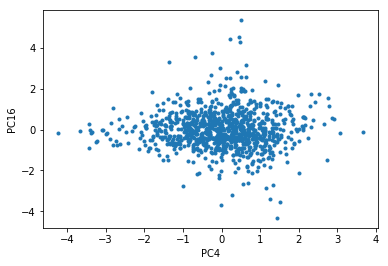

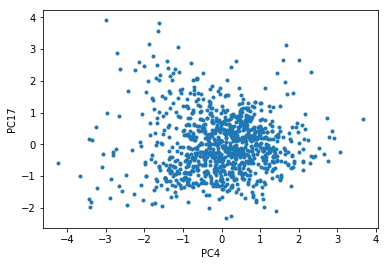

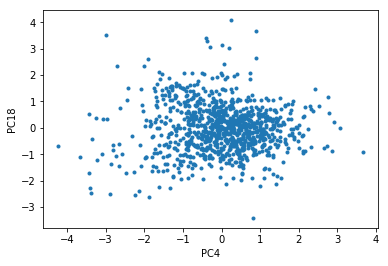

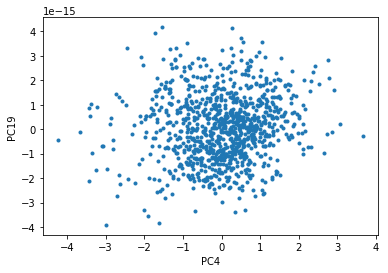

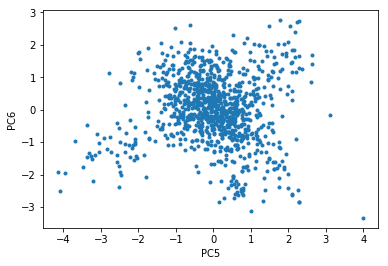

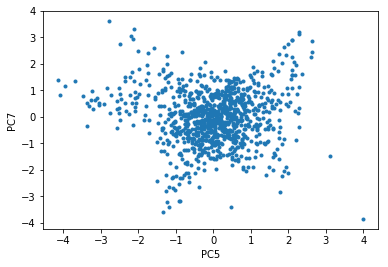

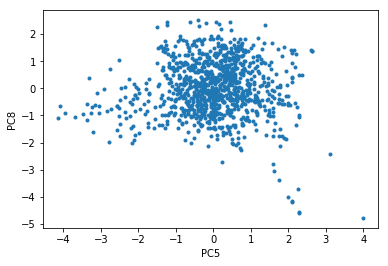

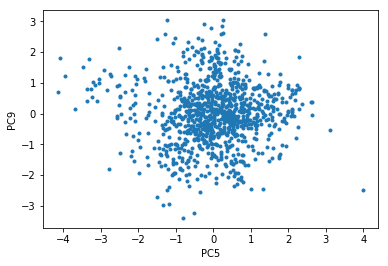

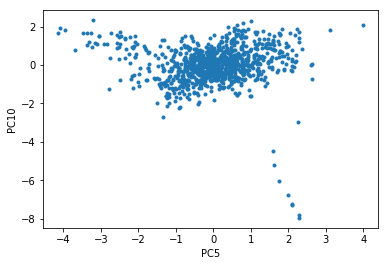

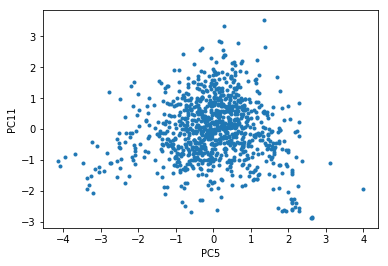

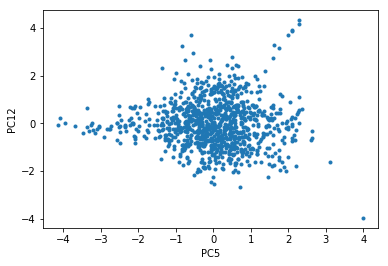

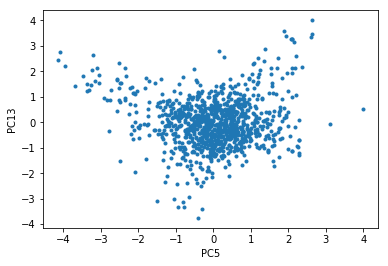

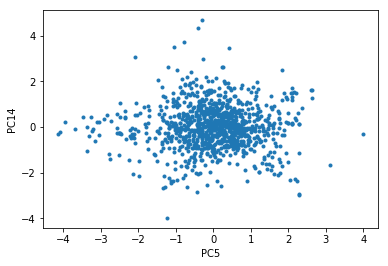

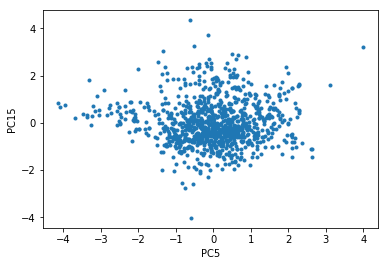

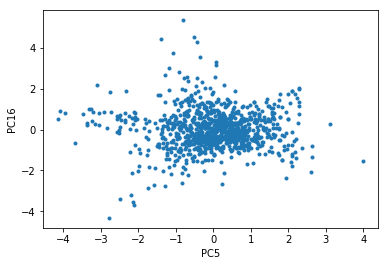

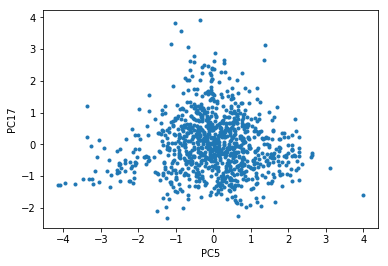

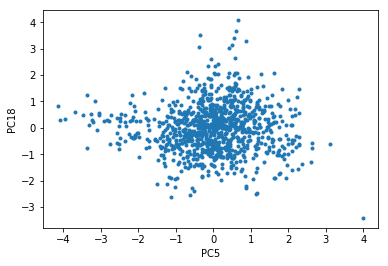

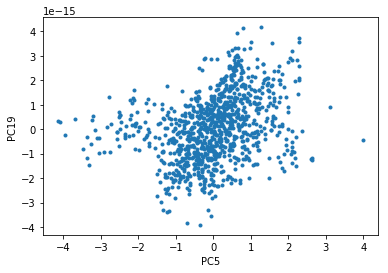

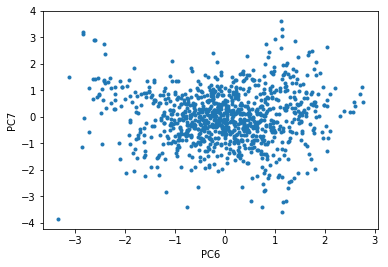

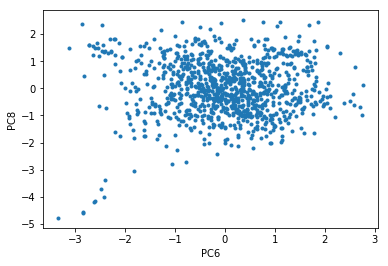

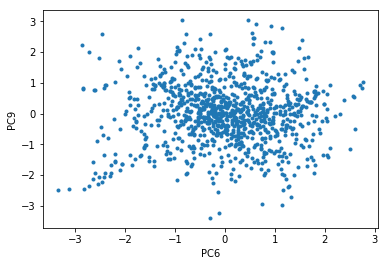

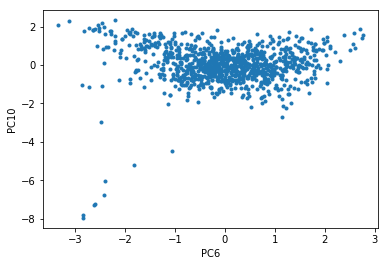

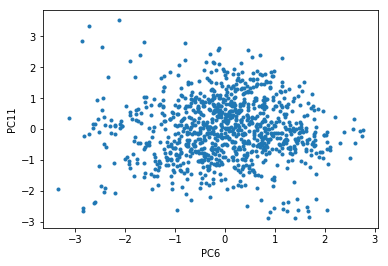

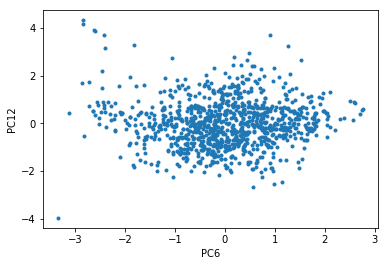

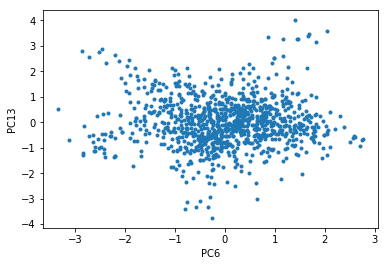

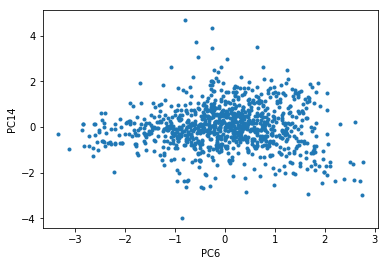

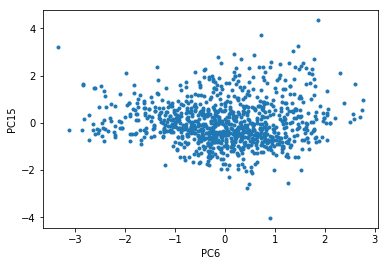

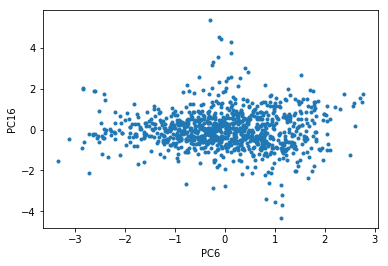

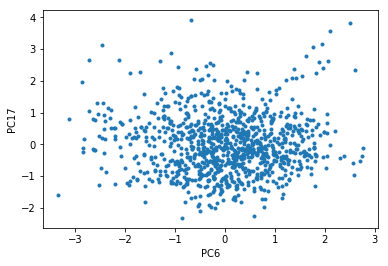

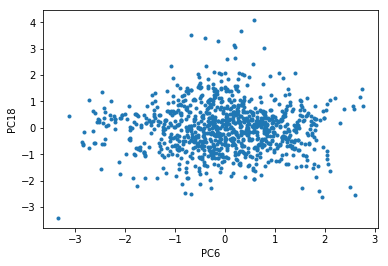

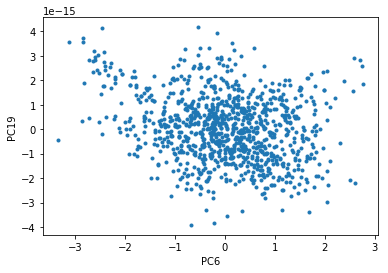

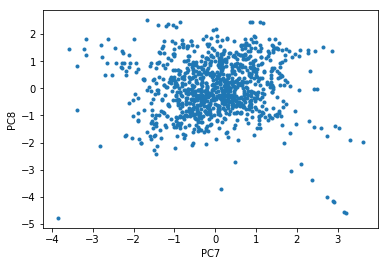

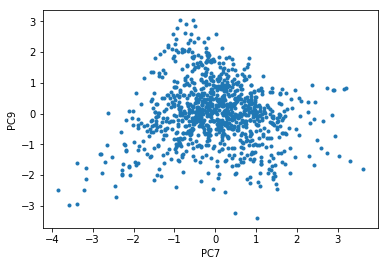

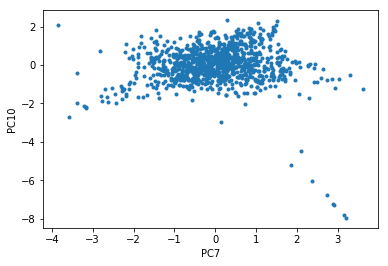

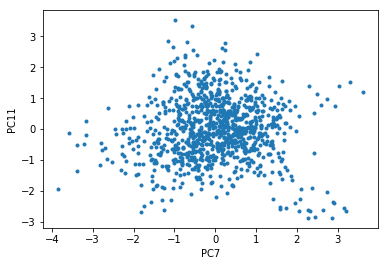

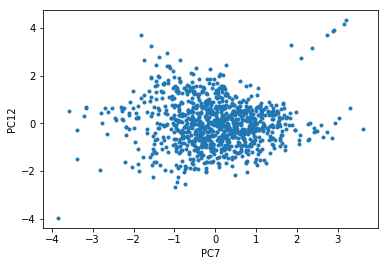

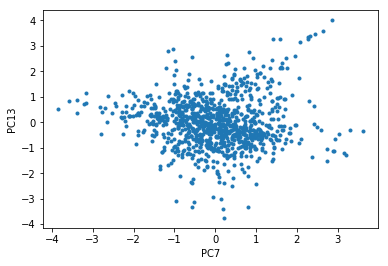

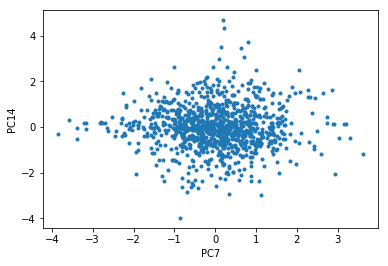

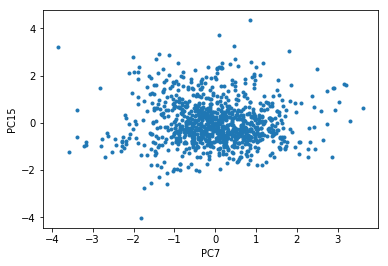

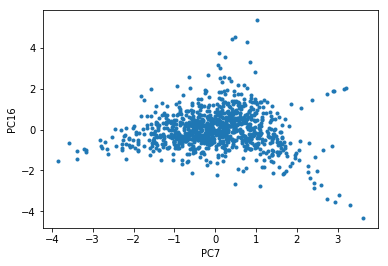

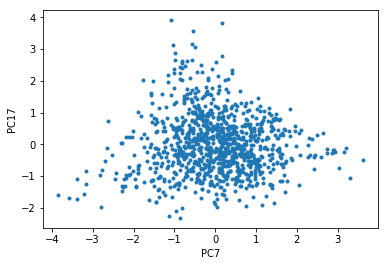

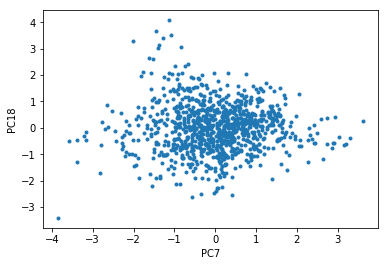

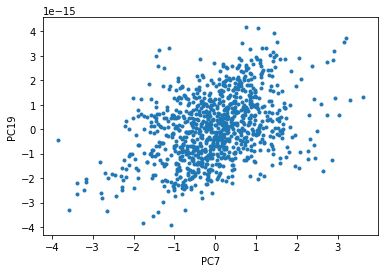

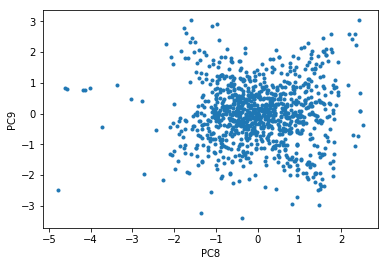

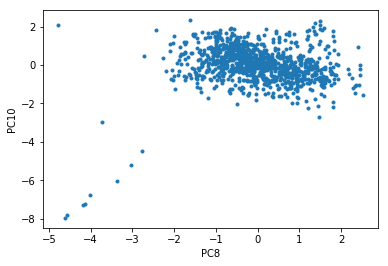

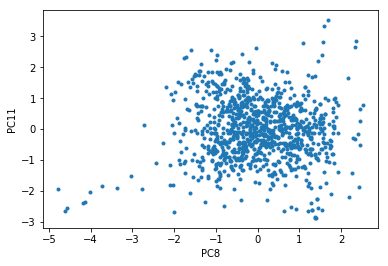

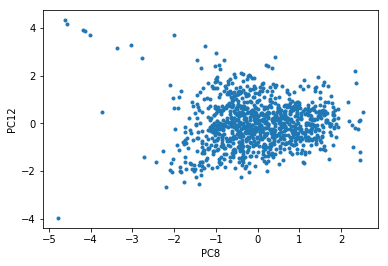

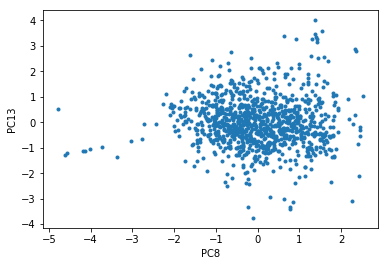

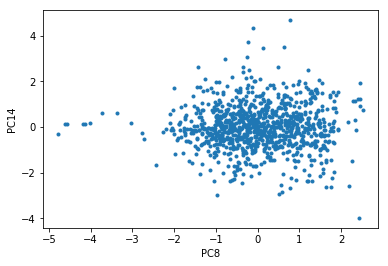

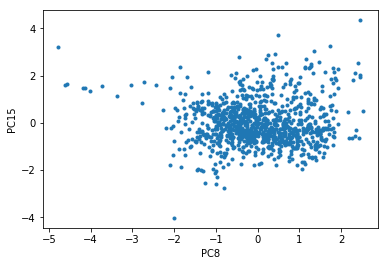

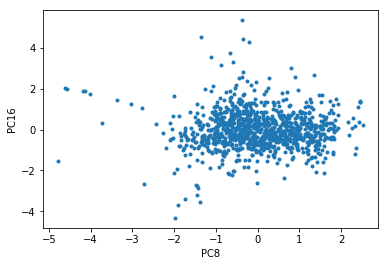

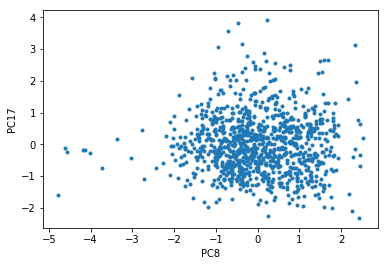

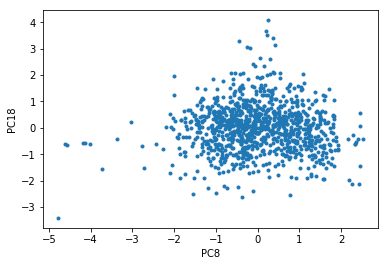

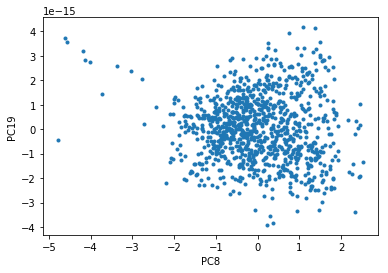

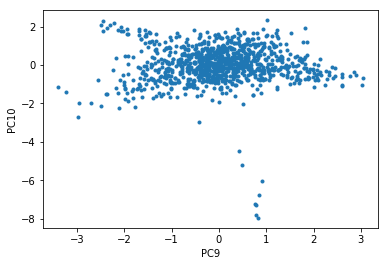

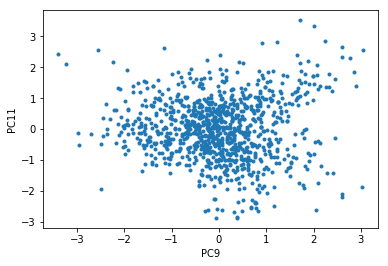

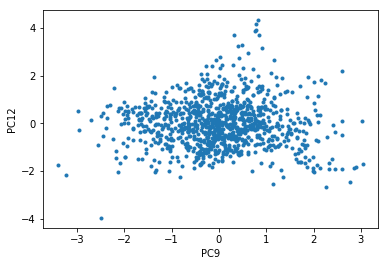

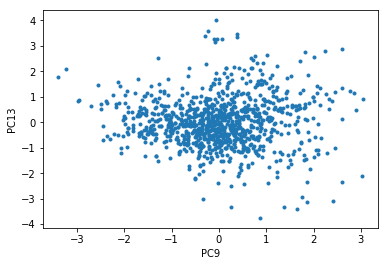

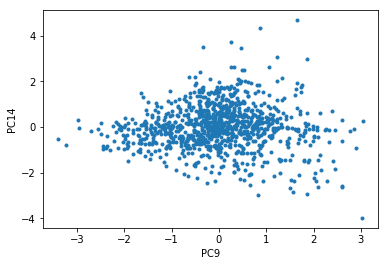

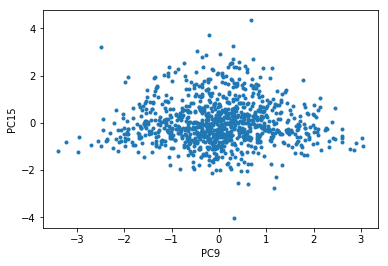

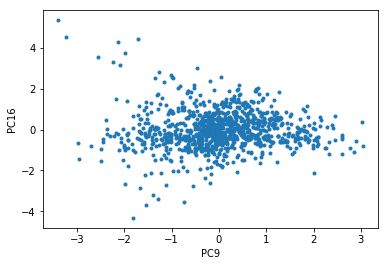

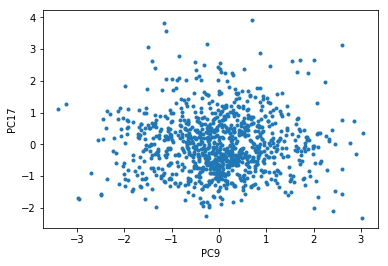

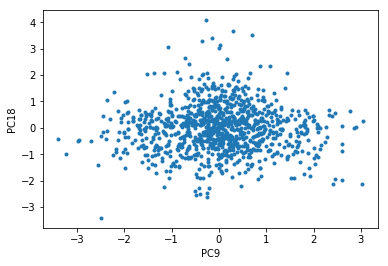

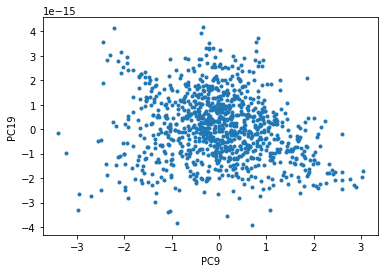

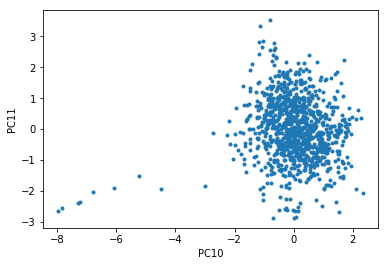

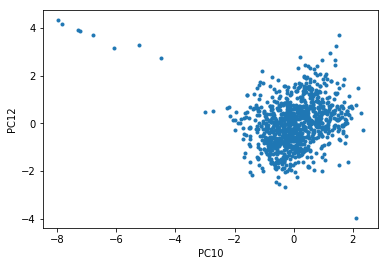

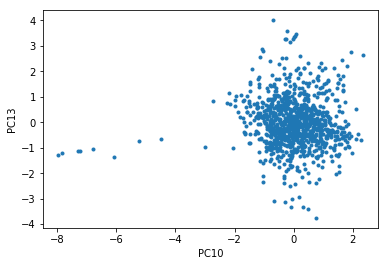

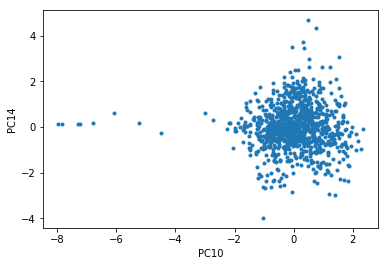

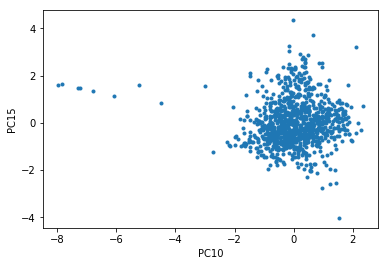

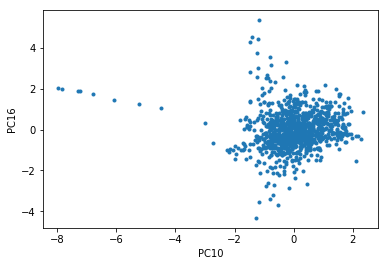

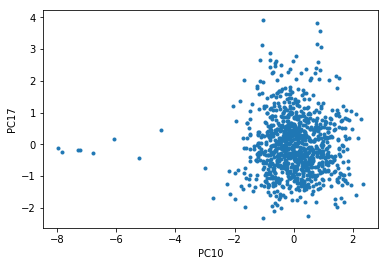

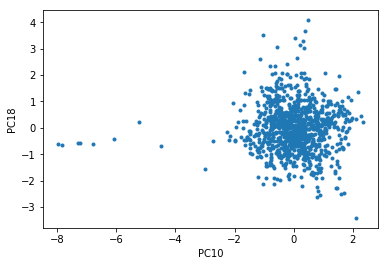

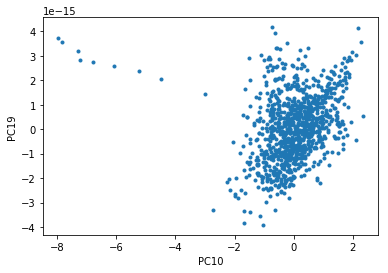

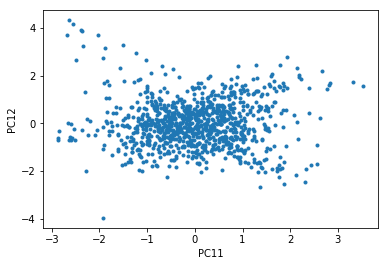

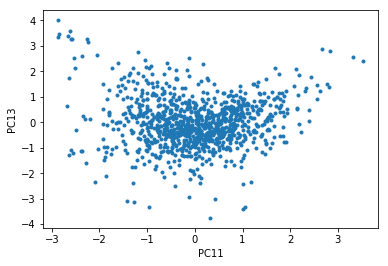

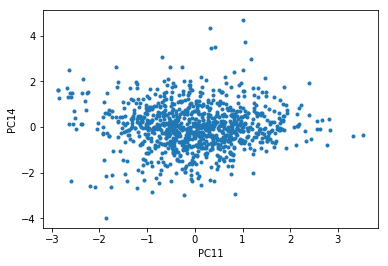

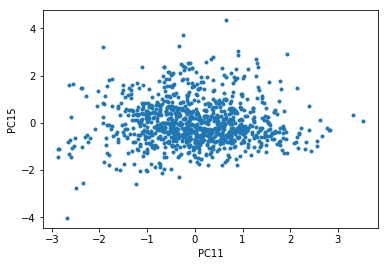

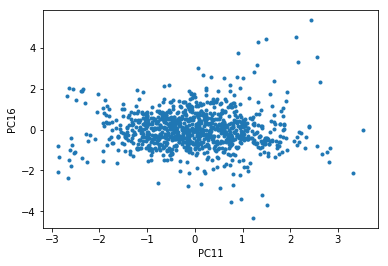

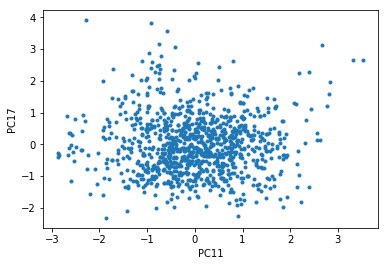

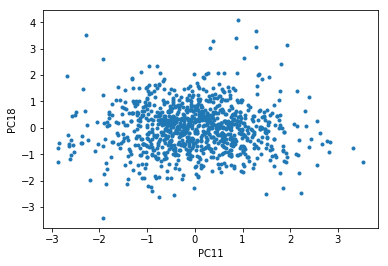

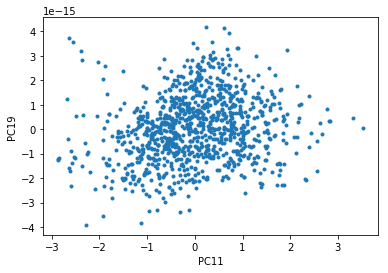

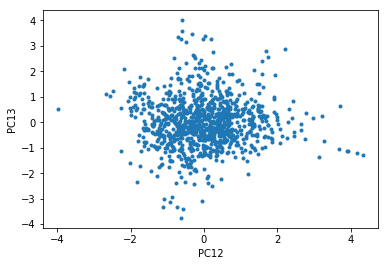

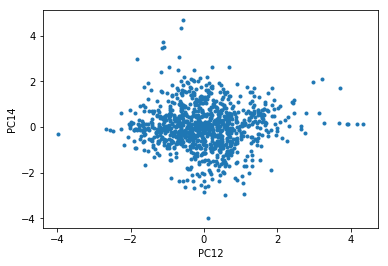

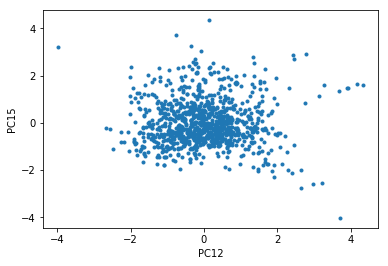

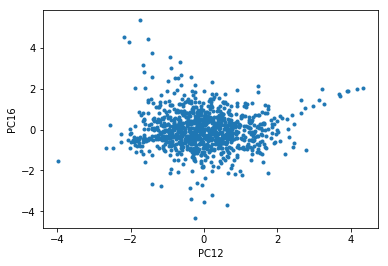

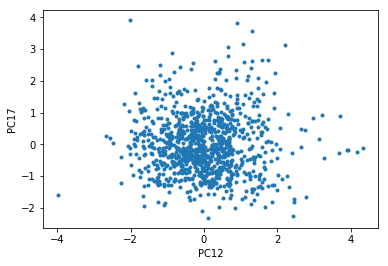

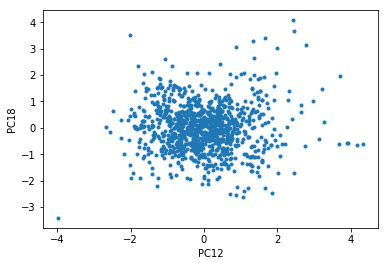

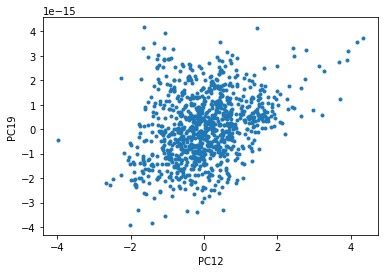

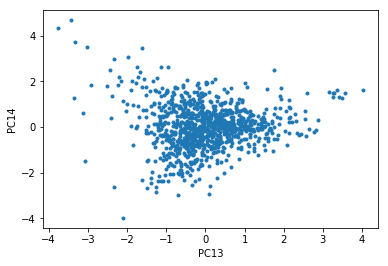

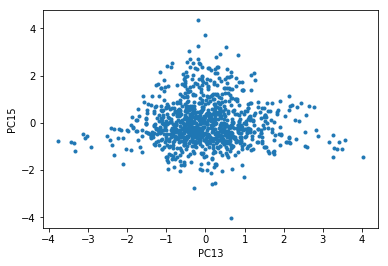

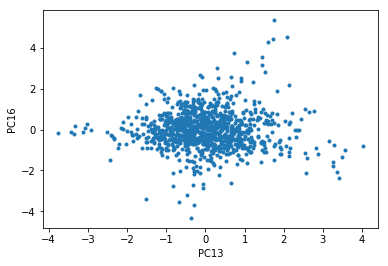

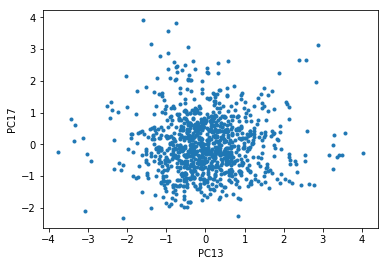

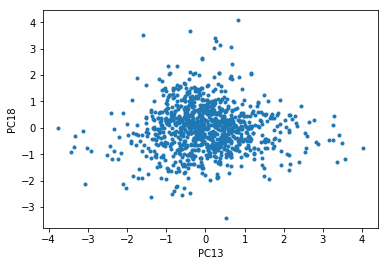

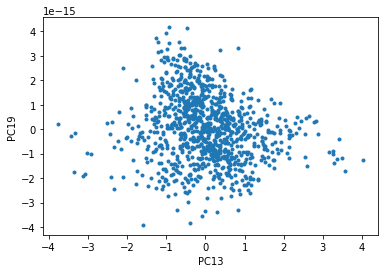

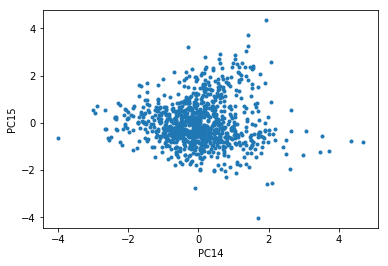

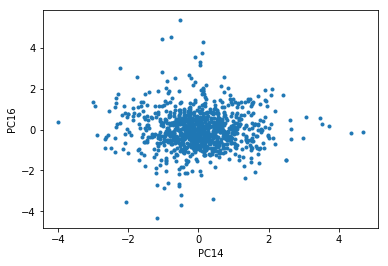

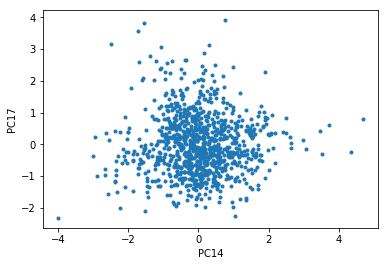

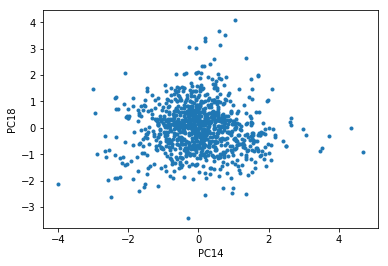

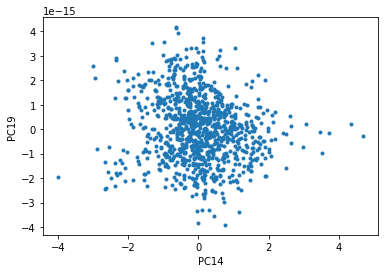

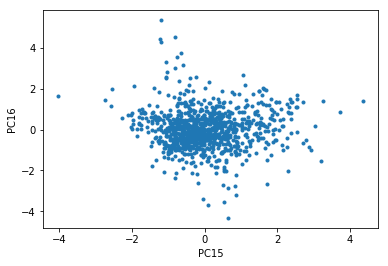

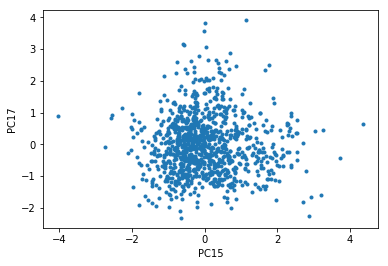

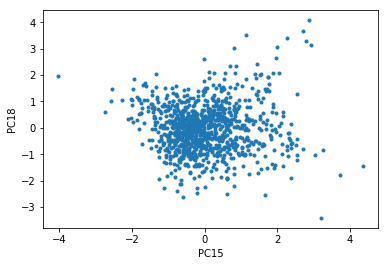

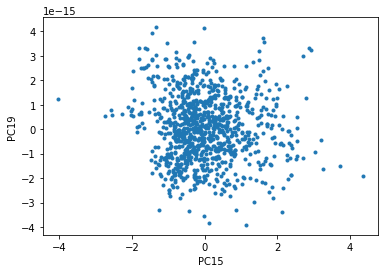

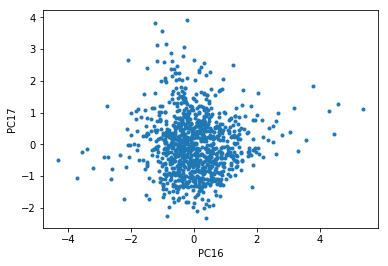

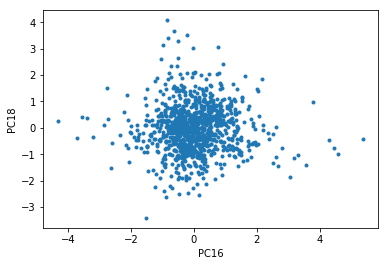

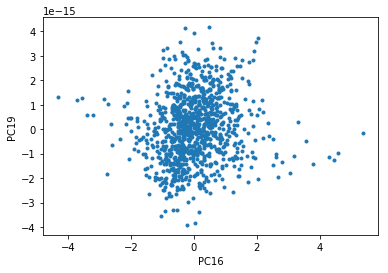

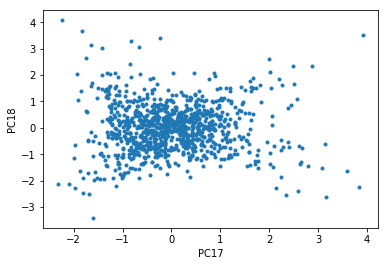

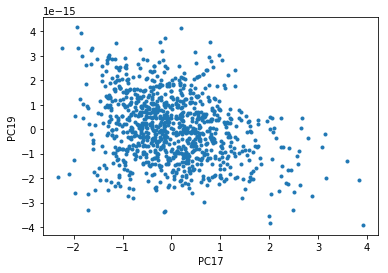

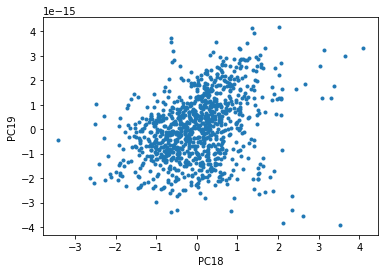

In [28]:
for i in range(20):
    for j in range(20):
        if i<j:
            W = svd_u[:,[i,j]]
            data_proj = data_std @ W
            plt.subplot(1, 1, 1)
            plt.plot(data_proj[:,0], data_proj[:,1], '.')
            plt.xlabel('PC{}'.format(i))
            plt.ylabel('PC{}'.format(j))
            plt.show()